In [ ]:
# import h5py

# filename = '/Volumes/Extreme Pro/2024-05-01 M2 AMMTO Fatigue Blanks 05.hdf5'
# with h5py.File(filename, 'r') as f:
#     data = f['slices/registered_data/x-ray_ct_data'][:]
#     print(data.shape, data.dtype)
#     print(data)

In [5]:
pip install h5py

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.8 MB 492 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


(800, 900) uint16


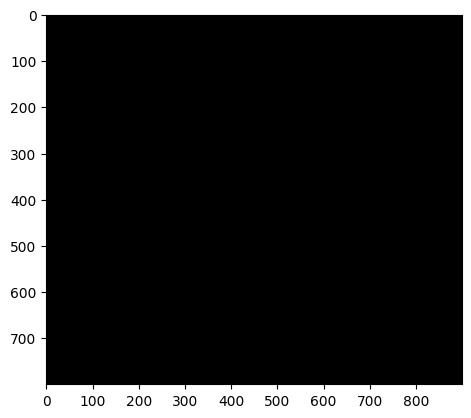

In [6]:
import h5py
import matplotlib.pyplot as plt
import os

filename = '/Volumes/Extreme Pro/2024-05-01 M2 AMMTO Fatigue Blanks 05.hdf5'
save_dir = '/Users/Joc/c++/SMP/ORNL splitted'

with h5py.File(filename, 'r') as f:
        data = f['slices/registered_data/x-ray_ct_data'][1000, 7800:8600, 10000: 10900]

        # save_filename = f'slice_{i}.png'
        # save_path = os.path.join(save_dir, save_filename)
    
        print(data.shape, data.dtype)
    
        plt.imshow(data, aspect="auto", cmap='gray')
        plt.gca().set_aspect("equal")
        plt.show()
    
        # Ask user before saving
        # confirm = input("Save this image? Type 'yes' to confirm: ").strip().lower()
        # if confirm == 'yes':
        # os.makedirs(save_dir, exist_ok=True)
        # plt.imsave(save_path, data, cmap='gray')
        # print(f"Image saved to {save_path}")
        # else:
        #     print("Image not saved.")




In [1]:
import h5py
import matplotlib.pyplot as plt
import os

filename = '/Volumes/Extreme Pro/2024-05-01 M2 AMMTO Fatigue Blanks 05.hdf5'
save_dir = '/Users/Joc/c++/SMP/ORNL splitted'
with h5py.File(filename, 'r') as f:
    for i in range (0, 1000):
        data = f['slices/registered_data/x-ray_ct_data'][i, 7200:8100, 1720:2620]

        save_filename = f'slice_{i}.png'
        save_path = os.path.join(save_dir, save_filename)
    
        # print(data.shape, data.dtype)
    
        # plt.imshow(data, aspect="auto", cmap='gray')
        # plt.gca().set_aspect("equal")
        # plt.show()
    
        # Ask user before saving
        # confirm = input("Save this image? Type 'yes' to confirm: ").strip().lower()
        # if confirm == 'yes':
        os.makedirs(save_dir, exist_ok=True)
        plt.imsave(save_path, data, cmap='gray')
        print(f"Image saved to {save_path}")
        # else:
        #     print("Image not saved.")




Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_0.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_1.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_2.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_3.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_4.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_5.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_6.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_7.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_8.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_9.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_10.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_11.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_12.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_13.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_14.png
Image saved to /Users/Joc/c++/SMP/ORNL splitted/slice_15.png
Image saved to /Users/Joc/c++/SMP/

KeyboardInterrupt: 

In [7]:
output_image = "ornl_sample_slice.png"  # Output image file name

with h5py.File(filename, 'r') as f:
    data = f['slices/registered_data/x-ray_ct_data'][:, :, :]

    print("Shape:", data.shape)
    print("Data type:", data.dtype)

    # Take the middle slice along the z-axis
    middle_slice = data[data.shape[0] // 2, :, :]

    # Show and save the slice
    plt.imshow(middle_slice, cmap='gray', aspect="auto")
    plt.gca().set_aspect("equal")
    plt.axis('off')  # Hide axes for clean image
    plt.tight_layout()

    # Save the image
    plt.savefig(output_image, dpi=300, bbox_inches='tight', pad_inches=0)
    print(f"Saved slice to {output_image}")

    # Show the image
    plt.show()
    

In [3]:
with h5py.File(filename, 'r') as f:
    data = f['slices/registered_data/x-ray_ct_data'][1000,:,:]

    print(data.shape, data.dtype)

    plt.imshow(data, aspect = "auto")
    plt.gca().set_aspect("equal")

    plt.show()

NameError: name 'h5py' is not defined

In [13]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

filename = '/Volumes/Extreme Pro/2024-05-01 M2 AMMTO Fatigue Blanks 05.hdf5'
output_dir = '/Users/Joc/c++/SMP/ORNL splitted'
os.makedirs(output_dir, exist_ok=True)

with h5py.File(filename, 'r') as f:
    data = f['slices/registered_data/x-ray_ct_data'][600, :, :]
    print("Data shape:", data.shape)

#normalise uint26 to uint 18 which is expected by OpenCV
norm_img = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# === Detect all circles ===
circles = cv2.HoughCircles(norm_img, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
                           param1=100, param2=30, minRadius=50, maxRadius=0)

if circles is None:
    raise ValueError("❌ No circles found in the image.")

circles = np.round(circles[0, :]).astype("int")
print(f"✅ Detected {len(circles)} circles.")

tile_size = 30
tile_id = 0

for idx, (x, y, r) in enumerate(circles):
    print(f"🔵 Circle {idx+1}: Center=({x},{y}), Radius={r}")
    
    # Define square bounding box for each circle
    x_start = max(x - r, 0)
    y_start = max(y - r, 0)
    x_end = min(x + r, data.shape[1])
    y_end = min(y + r, data.shape[0])
    cropped = data[y_start:y_end, x_start:x_end]
    
    # Split the cropped circle into 30×30 tiles
    for i in range(0, cropped.shape[0] - tile_size + 1, tile_size):
        for j in range(0, cropped.shape[1] - tile_size + 1, tile_size):
            tile = cropped[i:i+tile_size, j:j+tile_size]
            
            # Normalize and save tile
            norm_tile = cv2.normalize(tile, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
            save_path = os.path.join(output_dir, f'tile_{tile_id}.png')
            cv2.imwrite(save_path, norm_tile)
            tile_id += 1

print(f"✅ Saved {tile_id} tiles to: {output_dir}")


Data shape: (13752, 13752)
✅ Detected 13300 circles.
🔵 Circle 1: Center=(10693,1594), Radius=419
🔵 Circle 2: Center=(8272,2815), Radius=419
🔵 Circle 3: Center=(3703,8644), Radius=418
🔵 Circle 4: Center=(4988,4587), Radius=419
🔵 Circle 5: Center=(6106,4517), Radius=418
🔵 Circle 6: Center=(5077,1943), Radius=417
🔵 Circle 7: Center=(5954,8504), Radius=419
🔵 Circle 8: Center=(8194,5449), Radius=418
🔵 Circle 9: Center=(7081,10915), Radius=418
🔵 Circle 10: Center=(3700,5715), Radius=418
🔵 Circle 11: Center=(10605,7141), Radius=418
🔵 Circle 12: Center=(9319,10789), Radius=417
🔵 Circle 13: Center=(4826,8558), Radius=419
🔵 Circle 14: Center=(10592,9640), Radius=417
🔵 Circle 15: Center=(3796,3079), Radius=418
🔵 Circle 16: Center=(7239,7357), Radius=419
🔵 Circle 17: Center=(4819,5651), Radius=417
🔵 Circle 18: Center=(6111,7433), Radius=419
🔵 Circle 19: Center=(3715,11137), Radius=418
🔵 Circle 20: Center=(9557,1666), Radius=417
🔵 Circle 21: Center=(10595,4231), Radius=418
🔵 Circle 22: Center=(5944

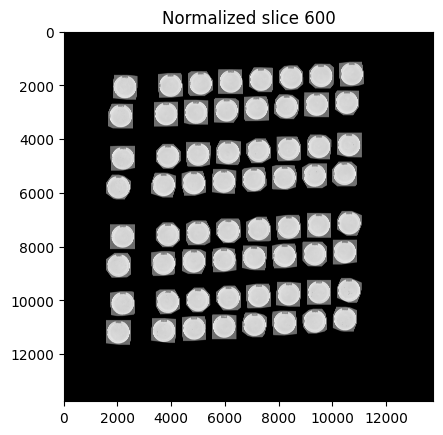

Saved tile_0.png at (5542,6200)
Saved tile_1.png at (11019,6963)
Saved tile_2.png at (1798,13560)
Saved tile_3.png at (4870,5965)
Saved tile_4.png at (10960,8508)
Saved tile_5.png at (11370,4720)
Saved tile_6.png at (1751,9267)
Saved tile_7.png at (1582,4818)
Saved tile_8.png at (5527,7022)
Saved tile_9.png at (4260,1819)
Saved tile_10.png at (4816,4237)
Saved tile_11.png at (8494,6719)
Saved tile_12.png at (5638,6283)
Saved tile_13.png at (10594,8491)
Saved tile_14.png at (10051,3682)
Saved tile_15.png at (11414,2334)
Saved tile_16.png at (1931,3865)
Saved tile_17.png at (2527,7494)
Saved tile_18.png at (8153,8042)
Saved tile_19.png at (8251,8949)
Saved tile_20.png at (10357,3715)
Saved tile_21.png at (9059,3625)
Saved tile_22.png at (5438,3786)
Saved tile_23.png at (3265,8267)
Saved tile_24.png at (4227,6268)
Saved tile_25.png at (5455,6878)
Saved tile_26.png at (7290,4963)
Saved tile_27.png at (4155,9935)
Saved tile_28.png at (1639,7665)
Saved tile_29.png at (7264,5049)
Saved tile_3

In [18]:
import h5py
import numpy as np
import cv2
import os
import hashlib
import random
import matplotlib.pyplot as plt

filename = '/Volumes/Extreme Pro/2024-05-01 M2 AMMTO Fatigue Blanks 05.hdf5'
output_dir = '/Users/Joc/c++/SMP/ORNL'
os.makedirs(output_dir, exist_ok=True)

slice_idx = 600
tile_size = 30
max_tiles = 600

with h5py.File(filename, 'r') as f:
    data = f['slices/registered_data/x-ray_ct_data'][slice_idx, :, :]


norm_img = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.imshow(norm_img, cmap='gray')
plt.title(f'Normalized slice {slice_idx}')
plt.show()

saved_hashes = set()
tile_id = 0

while tile_id < max_tiles:

    i = random.randint(0, norm_img.shape[0] - tile_size)
    j = random.randint(0, norm_img.shape[1] - tile_size)
    
    tile = norm_img[i:i+tile_size, j:j+tile_size].copy()
    
    tile_hash = hashlib.md5(tile.tobytes()).hexdigest()
    
    if tile_hash in saved_hashes:
        continue
    
    saved_hashes.add(tile_hash)
    save_path = os.path.join(output_dir, f'tile_{tile_id}.png')
    success = cv2.imwrite(save_path, tile)
    
    if success:
        print(f"Saved tile_{tile_id}.png at ({i},{j})")
        tile_id += 1
    else:
        print(f"Failed to save tile at ({i},{j})")


print(f"✅ Saved {tile_id} unique tiles from slice {slice_idx} ")
